# Preprocessing
Parse and clean fMRI data before running searchlight analysis

In [1]:
# Import dependencies
import numpy as np
import nibabel as nib # load nifti files
import glob # load files from a directory
from nilearn import image, plotting
from sklearn.svm import SVC 
from sklearn.model_selection import cross_val_score

In [2]:
# Define paths
import os
data_path = "../data"
results_path = "../results"

Successfully loaded: ../data/sub-213/anat/sub-213_acq-a_T1w.nii.gz
Successfully loaded: ../data/sub-213/anat/sub-213_acq-b_T1w.nii.gz
Successfully loaded: ../data/sub-214/anat/sub-214_acq-a_T1w.nii.gz
Successfully loaded: ../data/sub-219/anat/sub-219_acq-a_T1w.nii.gz
Successfully loaded: ../data/sub-219/anat/sub-219_acq-b_T1w.nii.gz
Successfully loaded: ../data/sub-221/anat/sub-221_acq-a_T1w.nii.gz
Successfully loaded: ../data/sub-220/anat/sub-220_acq-b_T1w.nii.gz
Successfully loaded: ../data/sub-220/anat/sub-220_acq-a_T1w.nii.gz
Successfully loaded: ../data/sub-218/anat/sub-218_acq-a_T1w.nii.gz
Successfully loaded: ../data/sub-218/anat/sub-218_acq-b_T1w.nii.gz
10

<class 'nibabel.nifti1.Nifti1Image'>
data shape (256, 256, 124)
affine:
[[  -0.859375      0.            0.          110.        ]
 [   0.            0.859375      0.         -110.        ]
 [   0.            0.            1.10000002  -68.20000458]
 [   0.            0.            0.            1.        ]]
metadata:
<class 

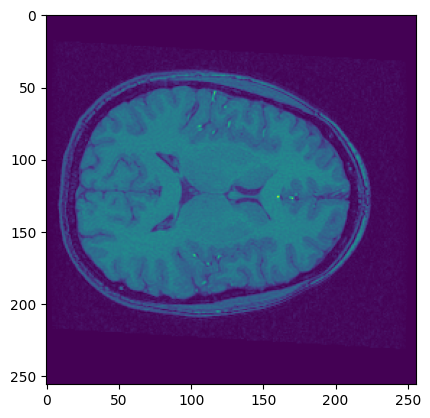

(array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],


In [9]:
def load_data(data_path):
    """
    Load all fMRI data from the data directory
    """
    # Check if the data path exists
    if not os.path.exists(data_path):
        raise ValueError("Data path does not exist")
    
    dataset = []
    data_path = os.path.join(data_path, '')
    pattern = os.path.join(data_path, 'sub-*/anat/*.nii.gz')
    files = glob.glob(pattern)

    # Check if the file exists
    if not files:
        raise FileNotFoundError("No files found in the {pattern}")
    
    for file in files:
        try:
            img = nib.load(file)
            dataset.append(img)
            print(f"Successfully loaded: {file}")
        except Exception as e:
            print(f"Error loading {file}: {str(e)}")
            continue
    
    if not dataset:
        raise ValueError("No valid NIfTI files found in the {pattern}")
        
    return dataset

data_path = "../data"
dataset = load_data(data_path)
print(len(dataset)) 
print(dataset[0])

# Visualize the data
import matplotlib.pyplot as plt
def visualize_data(data):
    """
    Visualize the data using nilearn's plotting functions
    """
    # Extract the data array and affine matrix from the nifti object
    data_array = data.get_fdata()
    affine = data.affine

    # Plot the data
    plt.imshow(data_array[:, :, 62])
    plt.show()

    return data_array, affine

visualize_data(load_data(data_path)[0])

